<html><center><h1>The objective is to predict taxi fare for a particular journey made <br> using <b>Random forest algorithm<h1></center>
</html>

Importing necessary libraries

In [20]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score
from sklearn import tree
plt.rcParams['figure.figsize']=(20,8)

Importing the Dataset

In [2]:
data=pd.read_csv("TaxiFare.csv")

In [4]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


Preprocessing of data

In [3]:
df=pd.DataFrame()
df['datetime']= pd.to_datetime(data["date_time_of_pickup"])

In [4]:
data['year'] = df['datetime'].dt.year 
data['month'] = df['datetime'].dt.month 
data['day'] = df['datetime'].dt.day 
data['hour'] = df['datetime'].dt.hour 
data['minute'] = df['datetime'].dt.minute
data['second']=df['datetime'].dt.second

In [5]:
data.drop(['unique_id','date_time_of_pickup'],axis=1,inplace=True)

In [18]:
data.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,0


In [38]:
print(data['year'].unique())
print(data['month'].unique())
print(len(data['day'].unique()))

[2009 2010 2011 2012 2013 2014 2015]
[ 6  1  8  4  3 11 12  9  7  2  5 10]
31


We can clearly see that people prefer travelling alone in Taxi

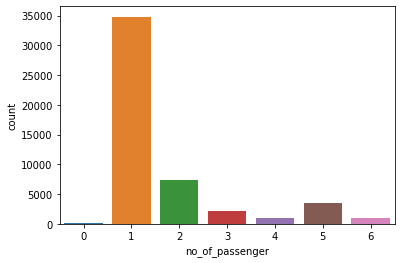

In [6]:
sns.countplot(x=data['no_of_passenger'])

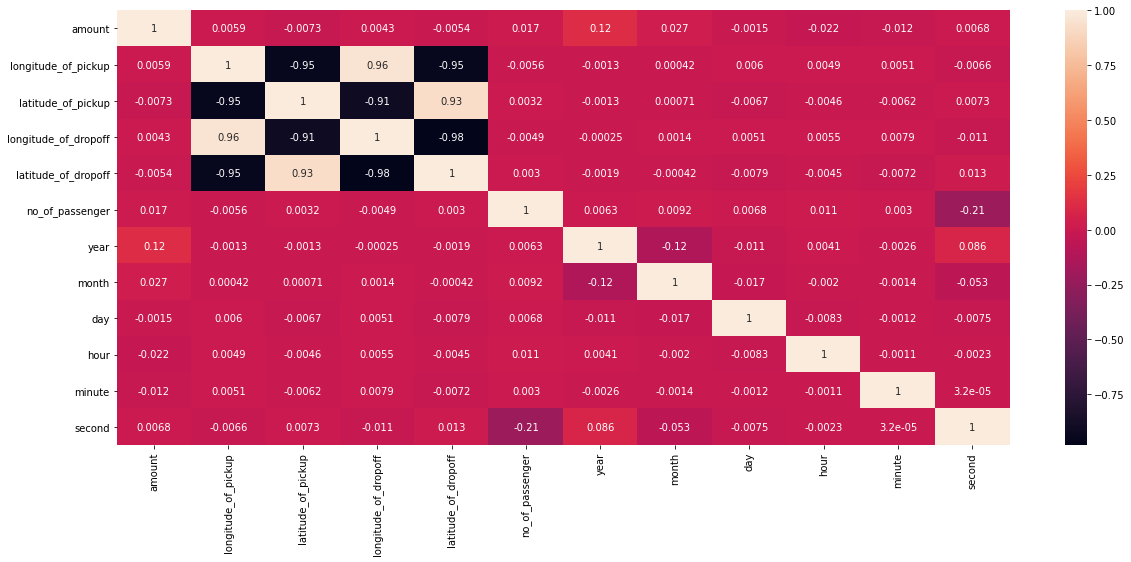

In [21]:
sns.heatmap(data.corr(),annot=True)

Splitting the dataset for training and testing

In [7]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data.drop(['amount'],axis=1),data['amount'],random_state=14,test_size=0.3)

In [14]:
rf=RandomForestRegressor(n_estimators=1000)

Building our Random forest model

In [15]:
rf.fit(Xtrain,Ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
pred=rf.predict(Xtest)

In [41]:
round(r2_score(Ytest,pred),2)*100

75.0

**Our model is 75% confident on it's prediction**

